In [7]:
library(data.table)
library(excel.link)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(cowplot)

Warning message:
"package 'gridExtra' was built under R version 3.3.2"Warning message:
"package 'cowplot' was built under R version 3.3.2"
Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave



In [6]:
#install.packages("excel.link",repos="http://cran.us.r-project.org")
#install.packages("gridExtra",repos = "http://cran.us.r-project.org")
#install.packages("cowplot",repos = "http://cran.us.r-project.org")

In [8]:
dt = xl.read.file("HistoFluxAssurVie V3bis.xlsb")

LIBPROCO
Libelle de la catégorie de produit assurance-vie et capitalisation

ASC
Année de souscription

AN_FLUX
Année d'occurrence du flux

AVA
Montant des flux de type "Avance"=prêt de l'assureur à l'assuré

AVT
Flux technique pas intéressant

DCD
Montant des flux de type "Décès"

RBA
Montant des flux de type "Remboursement d'avance"

REN
Montant des flux de type "Renonciation"

RTC
Montant des flux de type "Rachat partiel"

RTP
Montant des flux de type "Rachat total d'un contrat"

RVT
Flux technique pas intéressant

SOU
Montant des flux de type "Souscription d'un contrat"

TP-
Flux technique pas intéressant

TRF
Flux technique pas intéressant

TT-
Flux technique pas intéressant

VER
Montant des flux de type "Reversement"

In [9]:
new_names = c("lib_contrat",
"an_souscription",
"an_flux",
"mtf_Avance" ,
"useless1",
"mtf_Deces",
"mtf_Remboursement_davance",
"mtf_Renonciation",
"mtf_Rachat_partiel",
"mtf_Rachat_total",
"useless2",
"mtflux_Souscri_contrat",
"useless3",
"useless4",
"useless5",
"mtf_Reveresement")

#### rectification des noms de colonnes

In [114]:
vec.names.update = sapply(names(dt),function(x) gsub(" ","",x))
vec.names.update = sapply(vec.names.update, function(x) gsub("-","",x))

In [375]:
setnames(dt,vec.names.update)

In [10]:
setnames(dt,new_names)

In [11]:
names(dt)

[1] "lib_contrat"               "an_souscription"          
 [3] "an_flux"                   "mtf_Avance"               
 [5] "useless1"                  "mtf_Deces"                
 [7] "mtf_Remboursement_davance" "mtf_Renonciation"         
 [9] "mtf_Rachat_partiel"        "mtf_Rachat_total"         
[11] "useless2"                  "mtflux_Souscri_contrat"   
[13] "useless3"                  "useless4"                 
[15] "useless5"                  "mtf_Reveresement"

In [21]:
plot.1 = ggplot(dt, aes(x = an_souscription)) +
  geom_bar() + 
  scale_x_discrete(name="Année de souscription",limits=dt$an_souscription)+
  scale_y_continuous(name="Occurences")

## Barchart occurence d'année de souscriptions

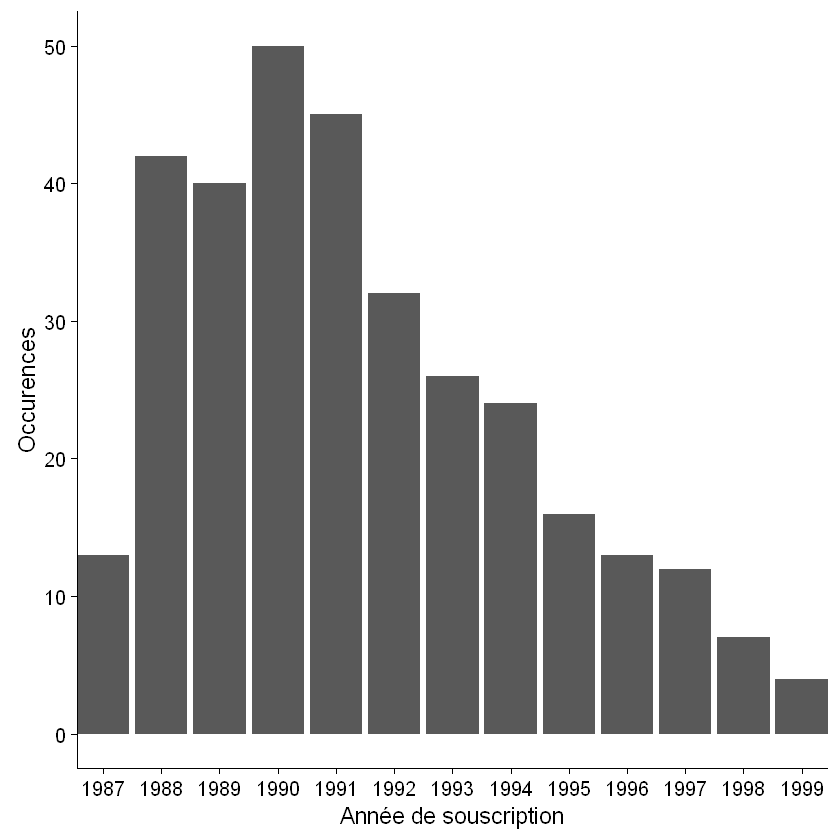

In [22]:
plot.1

In [19]:
plot.2 = ggplot(dt, aes(x = an_flux)) +
  geom_bar() +
  scale_x_discrete(name ="Année du flux",limits=dt$an_flux) +
  scale_y_continuous(name="Occurences")    

## Barchart année d'apparition d'un flux pour un contrat donné

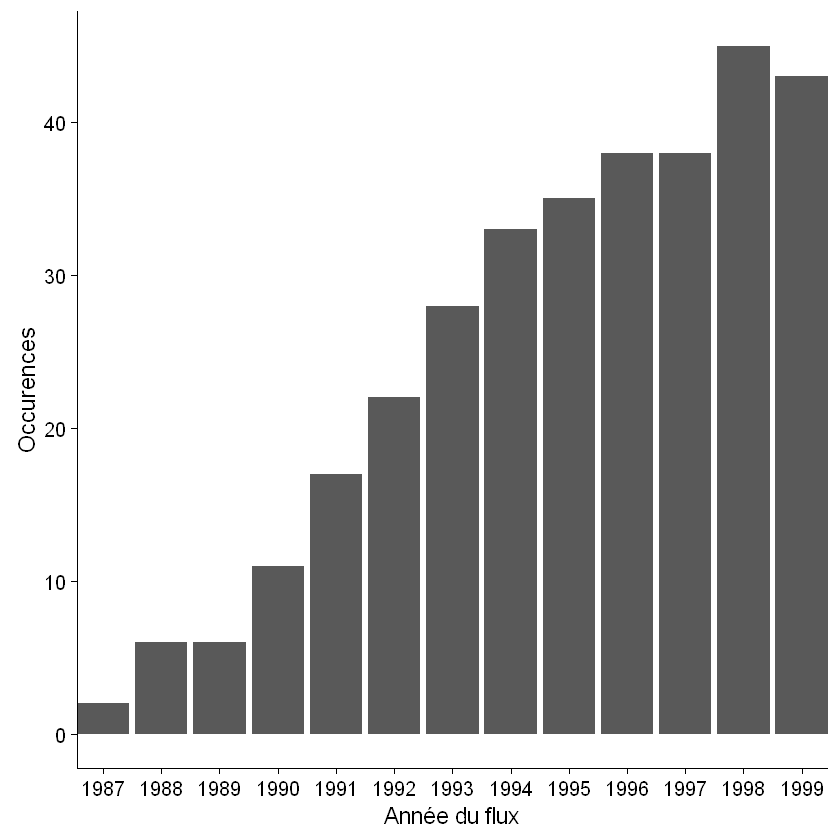

In [20]:
plot.2

### comparaison des deux graphes

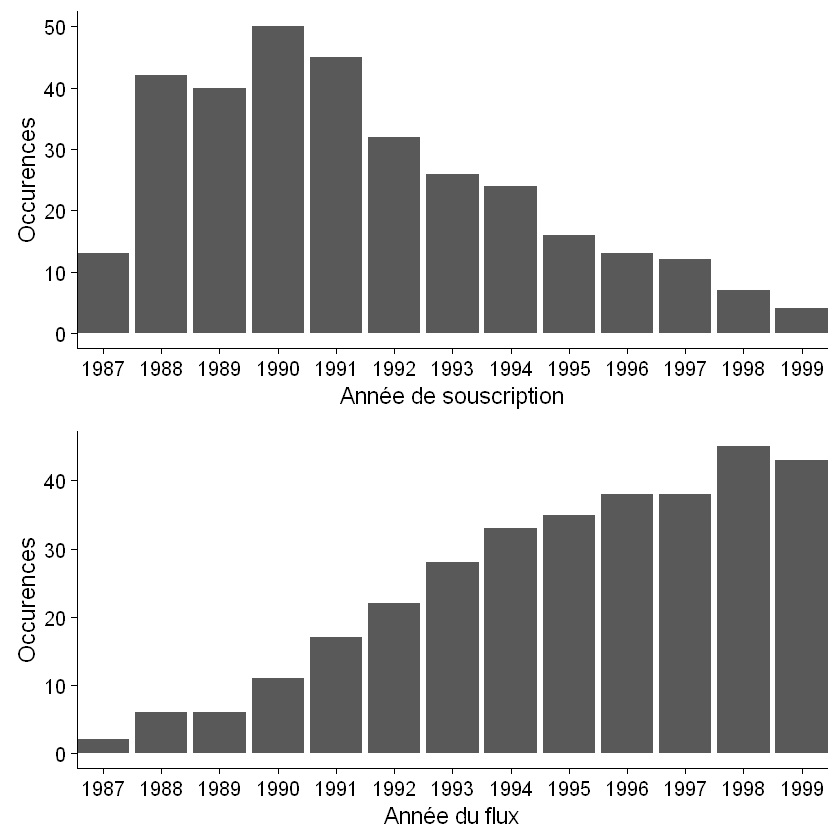

In [45]:
grid.arrange(plot.1,plot.2)

## Graphe des souscription avec chaque type de contrat

In [92]:
data.aggr = data.frame(
                         years = unique(dt$an_souscription)
                        )

In [93]:
for(lib in as.character(unique(dt$lib_contrat)) ){
   data.aggr[lib] = 0
}                       

In [94]:
for(index.row in seq(1,nrow(data.aggr)) ){
    
    for(index.row.dt in seq(1,nrow(dt)) ){
        
        if(data.aggr[index.row,"years"] == dt[index.row.dt,"an_souscription"]){
            
            column  = dt[index.row.dt,"lib_contrat"]
            if(column =="CAPI"){
                column = "CAPI"
            }
            #print(paste("here:",column,"value in data.aggr : ",data.aggr[index.row,column]))
            data.aggr[index.row,column] = data.aggr[index.row,column]+1
        }
    }
}

In [95]:
data.aggr.melt = melt(data.aggr,id.var="years")

### graphes des souscription par occurence par contrat / graphe pas très interpretable .. on va essayer avec les frequeneces

In [96]:
plot.3=ggplot(data.aggr.melt,aes(x=years,y=value,fill=variable) ) + 
    geom_bar(stat="identity")+
  scale_x_discrete(name ="Année de souscription",limits=dt$an_souscription) +
  scale_y_continuous(name="Occurences") 

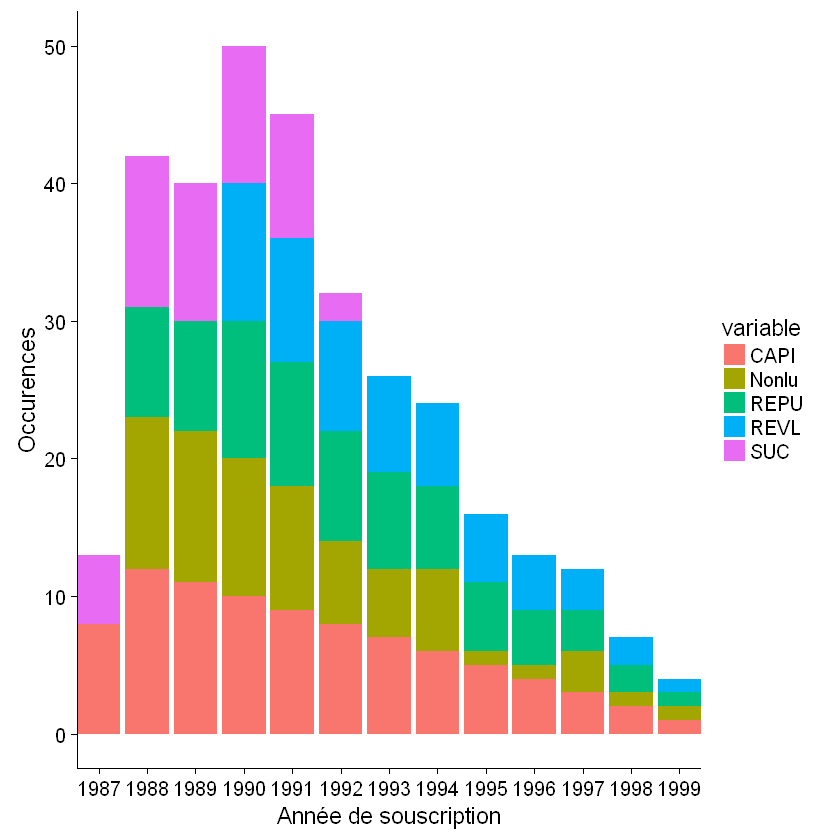

In [97]:
plot.3

In [98]:
data.aggr.freq = data.frame(years = data.aggr$years)

In [99]:
#sum(data.aggr[1,2:6]) somme des valeurs de la ligne 1 , des colonnes 2 à 6
colnames.data.aggr = names(data.aggr)
for(index.row in seq(1,nrow(data.aggr))){
    for(index.column in seq(2,ncol(data.aggr))){
        data.aggr.freq[index.row,paste0(colnames.data.aggr[index.column],"_freq")] = data.aggr[index.row,index.column] / sum(data.aggr[index.row,2:6])
    }
}

In [100]:
data.aggr.freq.melt = melt(data.aggr.freq,id.vars = "years")

In [101]:
plot.4 = ggplot(data.aggr.freq.melt,aes(x=years,y=value,fill=variable) ) + 
    geom_bar(stat="identity")+
  scale_x_discrete(name ="Année de souscription",limits=dt$an_souscription) +
  scale_y_continuous(name="Frequence") 

### Graphe avec les frequences

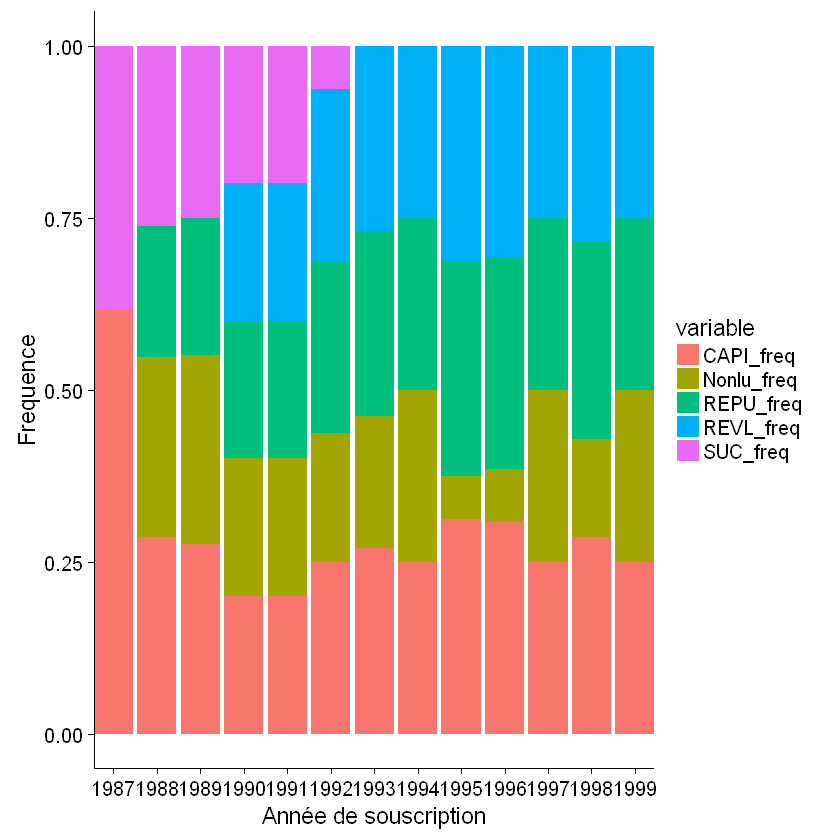

In [102]:
plot.4

## Graphe d'apparition de flux par type de contrat

In [103]:
data.aggr = data.frame(
                         years = unique(dt$an_flux)
                        )
for(lib in as.character(unique(dt$lib_contrat)) ){
   data.aggr[lib] = 0
}                       
for(index.row in seq(1,nrow(data.aggr)) ){
    
    for(index.row.dt in seq(1,nrow(dt)) ){
        
        if(data.aggr[index.row,"years"] == dt[index.row.dt,"an_flux"]){
            
            column  = dt[index.row.dt,"lib_contrat"]
            if(column =="CAPI"){
                column = "CAPI"
            }
            #print(paste("here:",column,"value in data.aggr : ",data.aggr[index.row,column]))
            data.aggr[index.row,column] = data.aggr[index.row,column]+1
        }
    }
}
data.aggr.melt = melt(data.aggr,id.var="years")

In [104]:
plot.5=ggplot(data.aggr.melt,aes(x=years,y=value,fill=variable) ) + 
    geom_bar(stat="identity")+
  scale_x_discrete(name ="Année de flux",limits=dt$an_souscription) +
  scale_y_continuous(name="Occurences") 

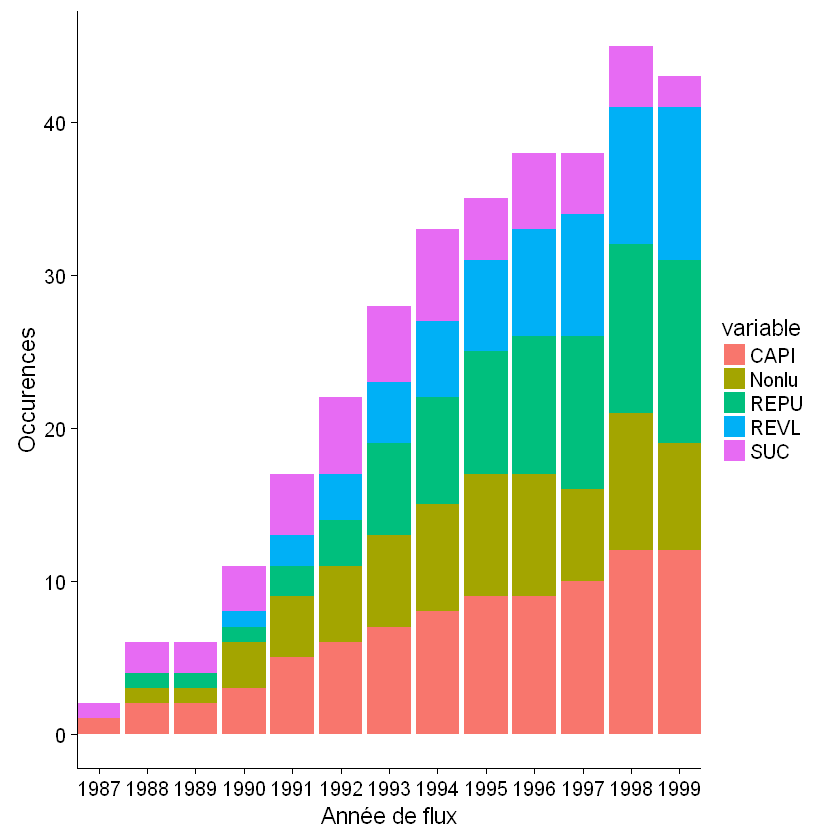

In [105]:
plot.5

In [106]:
data.aggr.freq = data.frame(years = data.aggr$years)
#sum(data.aggr[1,2:6]) somme des valeurs de la ligne 1 , des colonnes 2 à 6
colnames.data.aggr = names(data.aggr)
for(index.row in seq(1,nrow(data.aggr))){
    for(index.column in seq(2,ncol(data.aggr))){
        data.aggr.freq[index.row,paste0(colnames.data.aggr[index.column],"_freq")] = data.aggr[index.row,index.column] / sum(data.aggr[index.row,2:6])
    }
}
data.aggr.freq.melt = melt(data.aggr.freq,id.vars = "years")

In [107]:
plot.6 = ggplot(data.aggr.freq.melt,aes(x=years,y=value,fill=variable) ) + 
    geom_bar(stat="identity")+
  scale_x_discrete(name ="Année de flux",limits=dt$an_flux) +
  scale_y_continuous(name="Frequence")

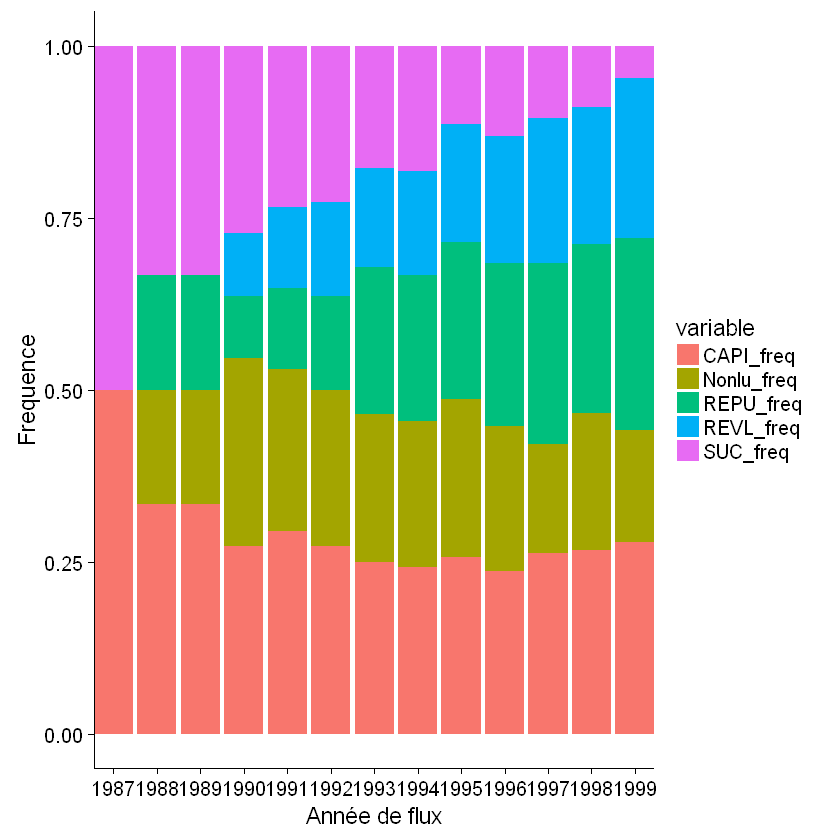

In [108]:
plot.6

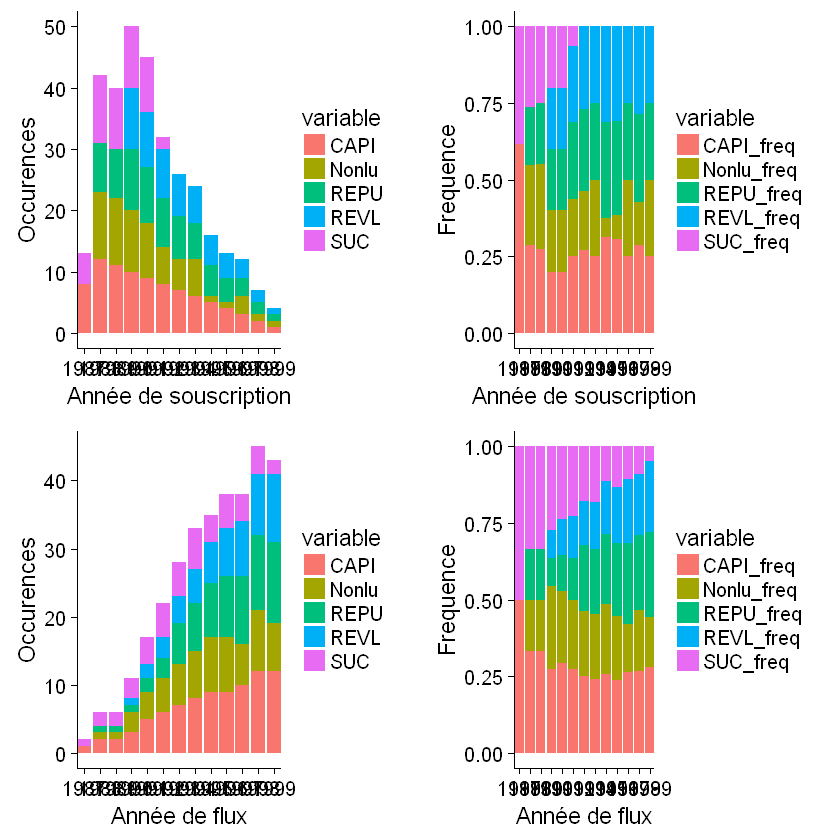

In [109]:
grid.arrange(plot.3,plot.4,plot.5,plot.6)

In [129]:
summary(dt)

   LIBPROCO              ASC          AN_FLUX          AVA           
 Length:324         Min.   :1987   Min.   :1987   Min.   :-22525873  
 Class :character   1st Qu.:1989   1st Qu.:1993   1st Qu.: -1563582  
 Mode  :character   Median :1991   Median :1996   Median :        0  
                    Mean   :1991   Mean   :1995   Mean   : -1787434  
                    3rd Qu.:1993   3rd Qu.:1998   3rd Qu.:        0  
                    Max.   :1999   Max.   :1999   Max.   :        0  
      AVT                DCD                 RBA                REN           
 Min.   :       0   Min.   :-81625030   Min.   :       0   Min.   :-27417003  
 1st Qu.:       0   1st Qu.: -4339470   1st Qu.:       0   1st Qu.:        0  
 Median :       0   Median :        0   Median :       0   Median :        0  
 Mean   :  235691   Mean   : -4442734   Mean   :  901853   Mean   :  -549947  
 3rd Qu.:       0   3rd Qu.:        0   3rd Qu.:  327054   3rd Qu.:        0  
 Max.   :16594037   Max.   :        

In [130]:
library(corrplot)

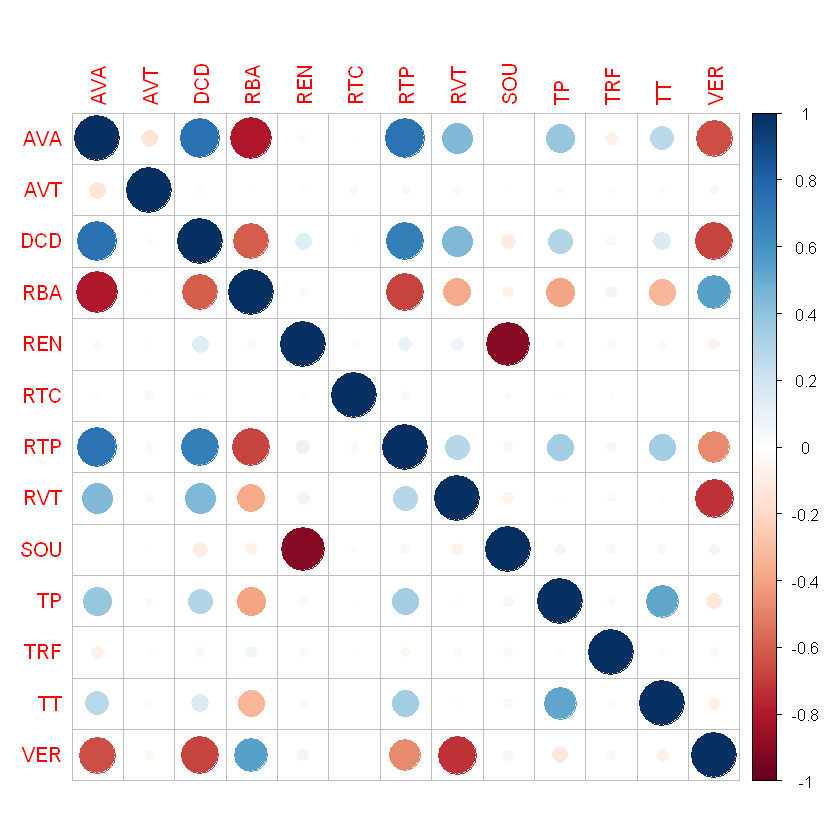

In [131]:
M = cor(dt[4:16])
corrplot(M, method = "circle")

## les flux les plus corrélés ( >0.38 de coef de corr)

In [132]:
vec.names.of.corr.vals = names(dt)[4:16]

In [398]:
vec.names.of.corr.vals = new_names[4:16]

In [399]:
new_names[4:16]

[1] "mtf_Avance"                "useless1"                 
 [3] "mtf_Deces"                 "mtf_Remboursement_davance"
 [5] "mtf_Renonciation"          "mtf_Rachat_partiel"       
 [7] "mtf_Rachat_total"          "useless2"                 
 [9] "mtflux_Souscri_contrat"    "useless3"                 
[11] "useless4"                  "useless5"                 
[13] "mtf_Reveresement"

In [276]:
?grid.arrange

In [400]:
#parcours de la #########editindgd matrice pour relever les coeff de correl |x| > 0.30
my.plots <- list()
index = 1
for(i in seq(1,ncol(M))){
    for(j in seq(1,nrow(M))){
        if( abs(M[i,j]) >0.38 && M[i,j] != 1){
            myx = vec.names.of.corr.vals[i]
            myy = vec.names.of.corr.vals[j]                
            my.plots[[index]] = ggplot(dt, aes_string(x =myx, y =myy))+
            geom_point(aes(color = lib_contrat, shape = lib_contrat))+
            geom_smooth()+
            scale_x_continuous(breaks=NULL)+
            scale_y_continuous(breaks=NULL)+
            panel_border()+
            theme(legend.position="none")          
            index = index+1
        }
    }
}

#parcours de la matrice pour relever les coeff de correl |x| > 0.30
my.plots <- list()
index = 1
for(i in seq(1,ncol(M))){
    for(j in seq(1,nrow(M))){
        if( abs(M[i,j]) >0.38 && M[i,j] != 1){
            myx = vec.names.of.corr.vals[i]
            myy = vec.names.of.corr.vals[j]                
            my.plots[[index]] = ggplot(dt, aes_string(x =myx, y =myy))+
            geom_point(aes(color = LIBPROCO, shape = LIBPROCO))+
            geom_smooth()+
            scale_x_continuous(breaks=NULL)+
            scale_y_continuous(breaks=NULL)+
            panel_border()+
            theme(legend.position="none")          
            index = index+1
        }
    }
}

In [401]:
legend = get_legend(ggplot(dt, aes_string(x =myx, y =myy))+
            geom_point(aes(color = lib_contrat, shape = lib_contrat)))

### get_legend function

In [162]:
get_legend<-function(myggplot){
  tmp <- ggplot_gtable(ggplot_build(myggplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)
}

In [ ]:
#do.call(grid.arrange,c(my.plots[1:3],ncol=3))
#do.call(grid.arrange,c(my.plots[4:7],ncol=3))

### on va simplement plot la distribution des flux corrélés à

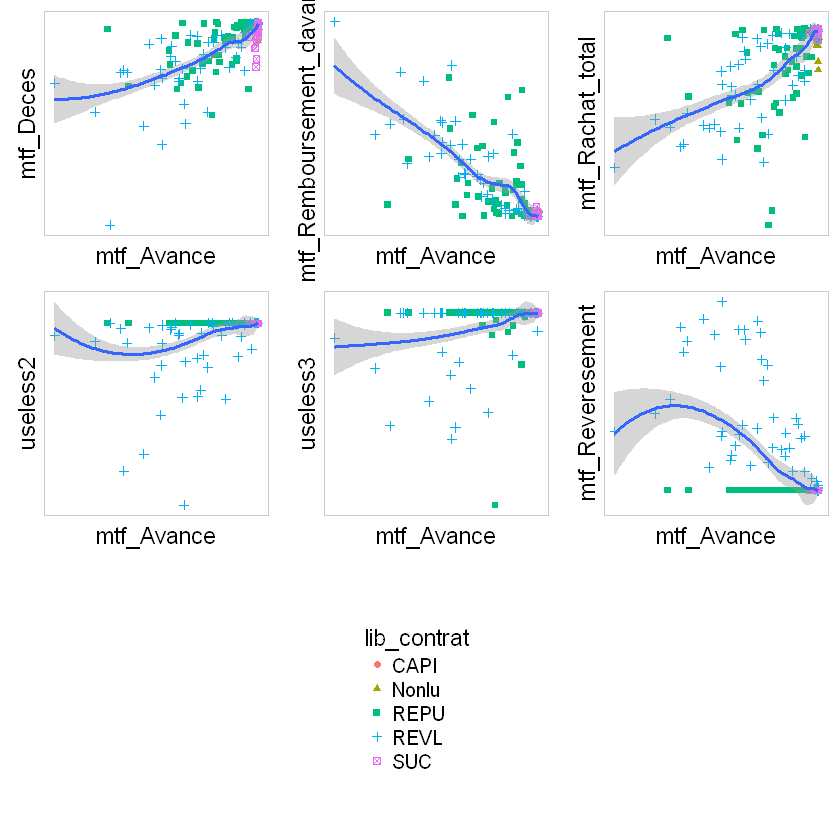

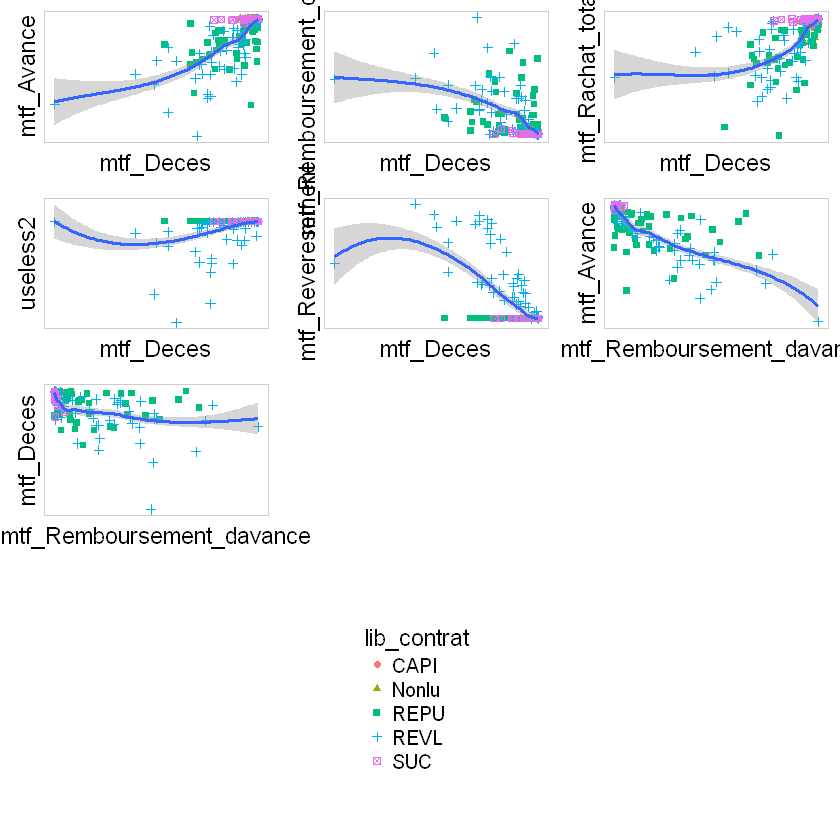

In [402]:
pfinal <- grid.arrange(arrangeGrob(... = ,grobs = my.plots[1:6],
                         ncol=3),
             legend, ncol=1,heights=c(20, 10))

pfinal2 <- grid.arrange(arrangeGrob(... = ,grobs = my.plots[7:13],
                         ncol=3),
             legend, ncol=1,heights=c(20, 10))

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name              grob
1 1 (1-1,1-1) arrange   gtable[arrange]
2 2 (2-2,1-1) arrange gtable[guide-box]


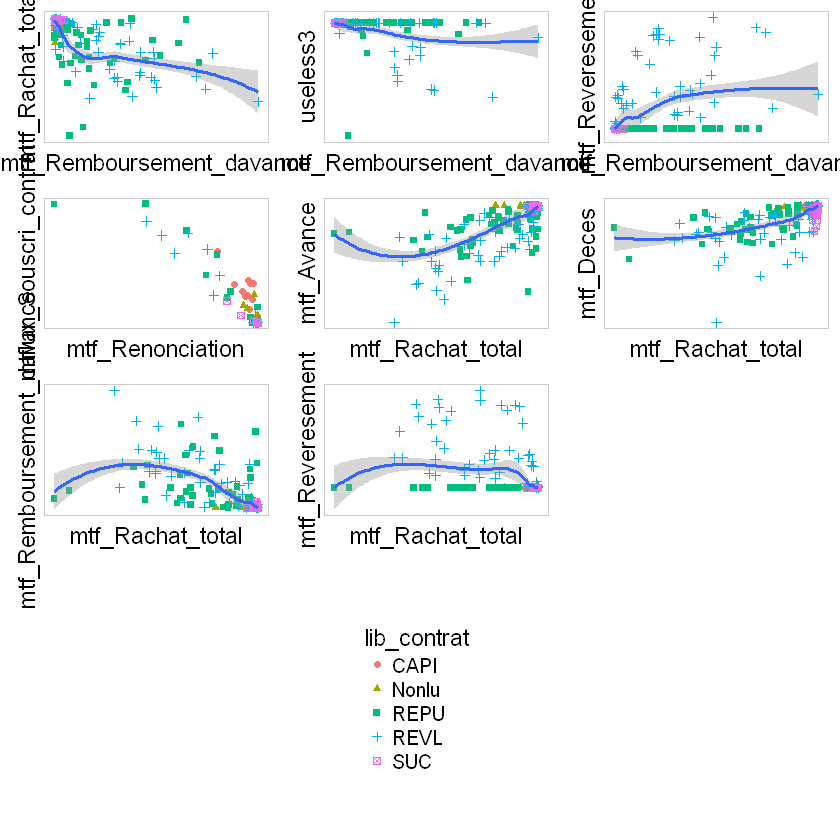

In [403]:
suppressWarnings(print(pfinal3 <- grid.arrange(arrangeGrob(... = ,grobs = my.plots[14:21],
                         ncol=3),
             legend, ncol=1,heights=c(20, 10))))

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name              grob
1 1 (1-1,1-1) arrange   gtable[arrange]
2 2 (2-2,1-1) arrange gtable[guide-box]


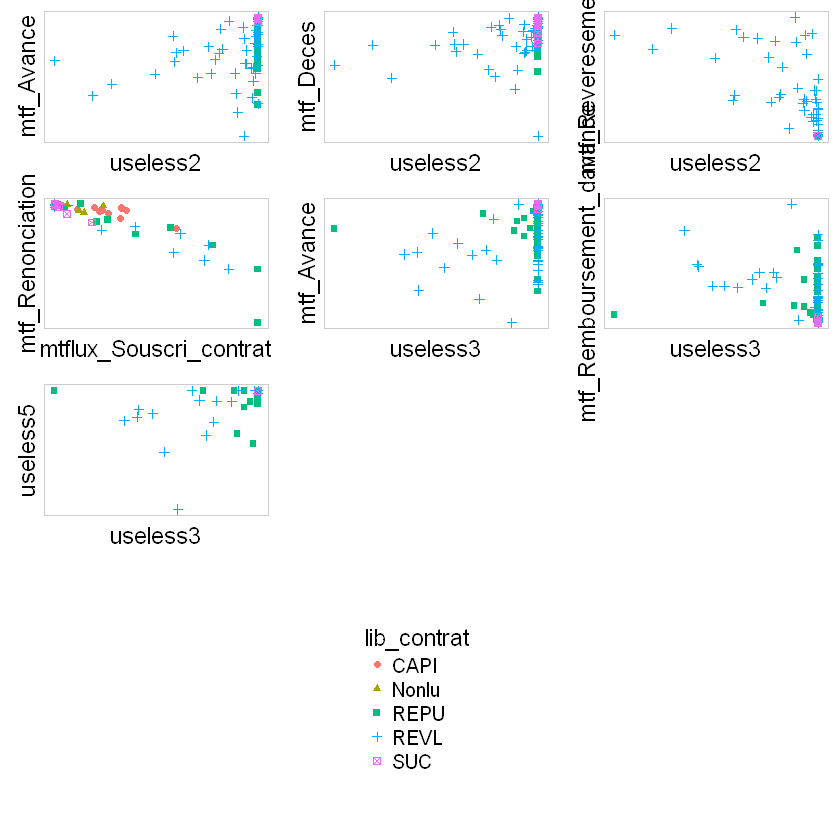

In [404]:
suppressWarnings(print( pfinal4 <- grid.arrange(arrangeGrob(... = ,grobs = my.plots[22:28],
                         ncol=3),
             legend, ncol=1,heights=c(20, 10)) ))


ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: '$' inattendu(e)
1: $
    ^
